## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 4
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with different types of data

----------------------------------------------------------

For this homework you will load the L data and practice making different kinds of plots!

This homework has **7 questions** from the lecture and **2 Problems** and a **Challenge**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the Data

In [8]:
file_location = 'https://joannabieri.com/introdatascience/data/loans_full_schema.csv'
DF = pd.read_csv(file_location)
show(DF)

### Check Observations and Variables

**Q1** How many **observations** are there?

**Q2** How many **variables** are there?

In [10]:
# Enter your code here to find the data shape
print(len(DF))
print(len(DF.columns))

10000
55


**(Double CLick Here to answer the questions))**
there are 10000 observations and 55 variables

### Reduce the number of variables

In [11]:
my_variables = ['loan_amount',
                'interest_rate',
                'term','grade',
                'state',
                'annual_income',
                'homeownership',
                'debt_to_income']

DF = DF[my_variables]

show(DF)

**Q3** Check out each of the variables (columns):

1. What does each column tell you? What are the units?
2. Is the data numerical? If so is it continuous or discrete?
3. If the categorical? If so is it ordinal or nominal?

<a href="https://www.openintro.org/data/index.php?data=loans_full_schema"> Here is a link to the full data description if you need to look up some of the column names.</a>

-----------------------------------------

**(Double Click Here)**
 - loan amount, $, numerical, discrete
 - interest rate, % interest, numerical, continuous
 - term, months, numerical, discrete
 - grade, grade, categorical, ordinal
 - state, state, categorical, nominal
 - annual income, $/year, numerical, discrete
 - homeownership, type of ownership, categorical, nominal
 - debt to income, debt/income, numerical, continuous

### Here is Example Code for a simple Histogram

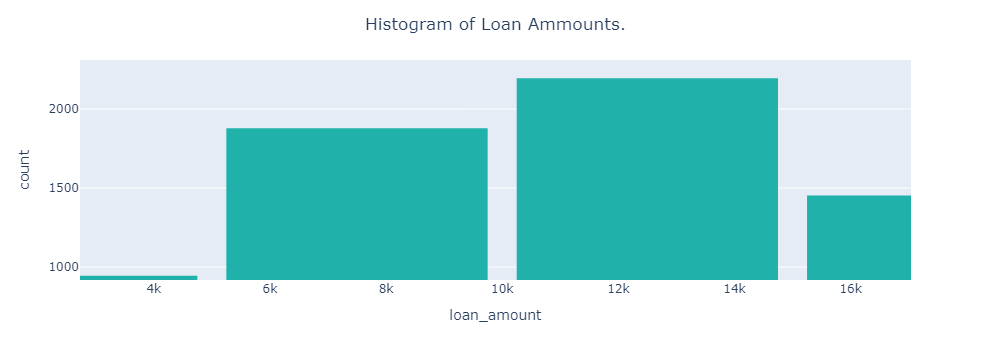

In [20]:
fig = px.histogram(DF,
                   nbins=10,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

**Q4** You try changing the number of bins **nbins** what do you notice? Are there good choices? Bad choices?


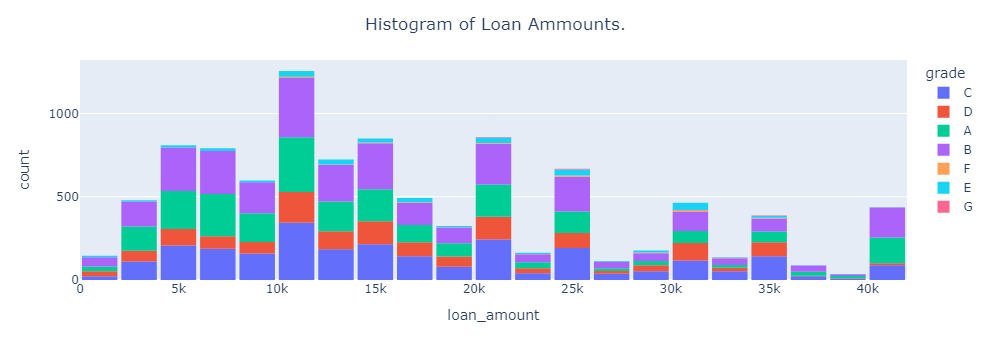

In [23]:
# Your code here (experiment here)
fig = px.histogram(DF,
                   nbins=23,
                   x='loan_amount',
                   color='grade')

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()

**(Double Click here to answer the questions)**
A very low or very high nbins value results in unhelpful data, as too low of a value results in too general data to draw any conclusions, and too high of a value results in the data giving outliers much more influence in any specific bracket

**Problem 1** Create a histogram of your own! Try making a histogram of one of the other pieces of numerical data. Make it as fancy as you want. Include some categorical information. Do you learn anything from your graph? If so what?


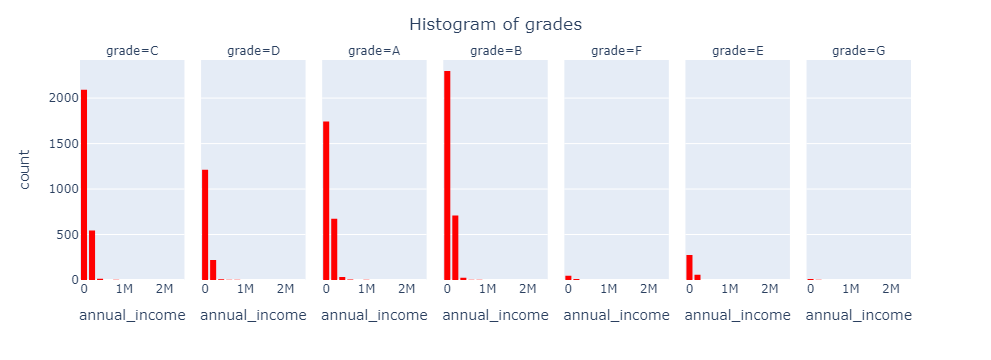

In [37]:
# Your code here
fig = px.histogram(DF, 
                   nbins=14,
                   x='annual_income',
                   facet_col='grade',
                   color_discrete_sequence=['red']
                  )
fig.update_layout(bargap=0.25,
                  title='Histogram of grades',
                  title_x=0.5)
fig.show()

### Here is example code for a histogram with a box plot included.

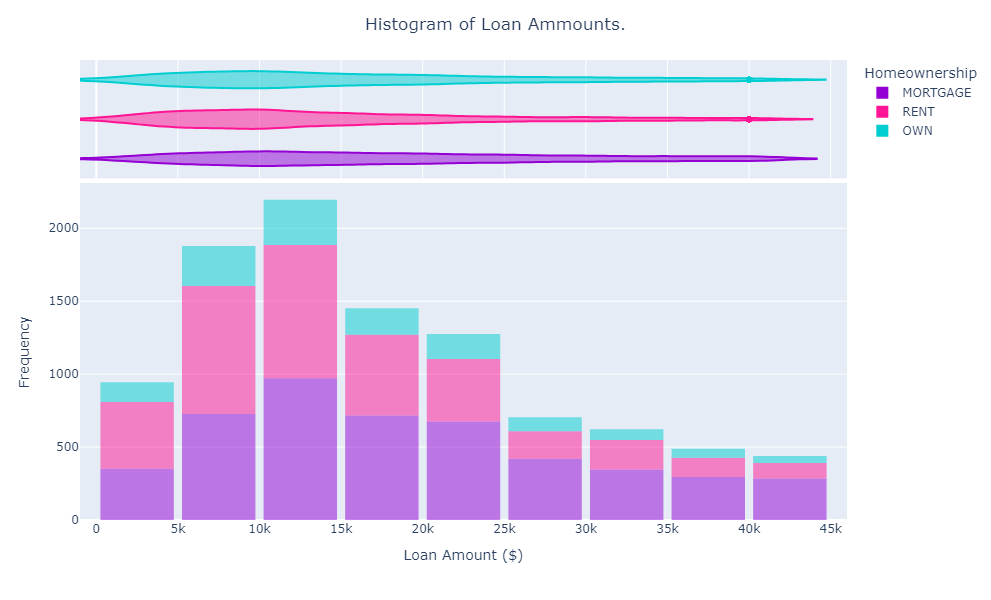

In [33]:
fig = px.histogram(DF,
                   nbins=9,
                   x='loan_amount',
                   color='homeownership',
                   opacity=0.5,
                   color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                   marginal="violin"
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

**Q5** Change the above plot to marginal="violin" and see what changes. Make some observations about the graph

**(Double Click Here)**
the bottom graph doesn't change, but the top graph changes to a violin graph with a frequency based on thickness rather than on quartile ranges

In [41]:
counts = DF['homeownership'].value_counts()
show(counts)

**Q6** Copy and past the code above, but change it to get value counts for one of the other categorical columns

In [40]:
## Your code here
counts = DF['grade'].value_counts()
show(counts)

### Here is example code for a bar plot

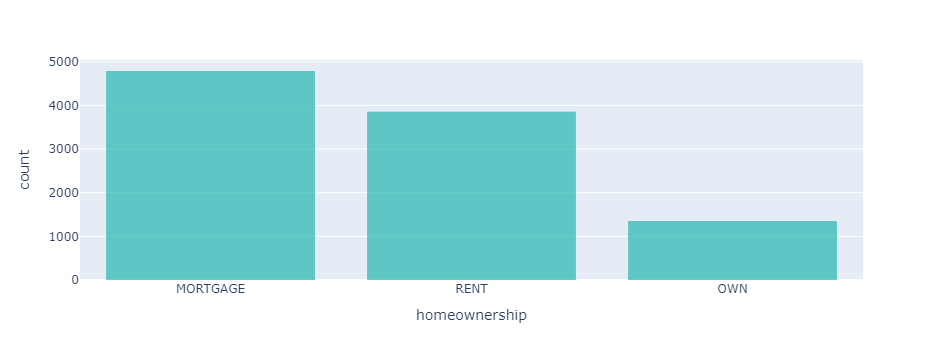

In [26]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.show()

**Q7** Can you figure out how to add x labels, y labels, and a title to this graph?

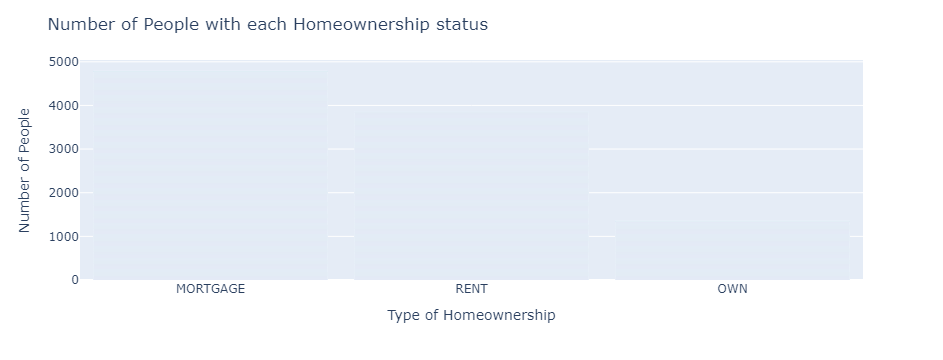

In [47]:
# Your code here
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen']
            )
fig.update_layout(bargap=0.1,
                 title='Number of People with each Homeownership status',
                 xaxis_title='Type of Homeownership',
                 yaxis_title='Number of People'
                 )
fig.show()

**Problem 2** Try to make your own bar plot of one of the other categorical columns. Add some categorical fill or facets. See how fancy you can make your graph. Make sure it is also still really informative.

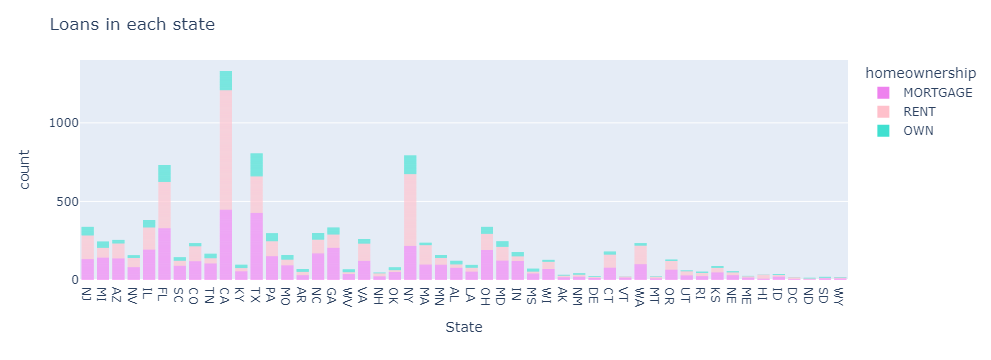

In [58]:
# Your code here
fig = px.bar(DF,
            x='state',
            color='homeownership',
            opacity=1,
            color_discrete_map={'MORTGAGE': 'violet', 
                                'RENT': 'pink', 
                                'OWN': 'turquoise'},
            )
fig.update_layout(bargap=0.2,
                 title='Loans in each state',
                 xaxis_title='State',
                 
                 )
fig.update_traces(dict(marker_line_width=0))

fig.show()

### Challenge:

Here is a data set that contains demographic data from the Behavioral Risk Factors Surveillance System from the CDC. It is a small subset of 60 observations.

Here is a link to the variable information:

<a href="https://www.openintro.org/data/index.php?data=cdc.samp" target="_blank">https://www.openintro.org/data/index.php?data=cdc.samp</a>

Your goal is to look at the columns and then make an graph from the data using what we learned in today's class.

In [2]:
file_location = 'https://joannabieri.com/introdatascience/data/cdc.samp.csv'
DF_new = pd.read_csv(file_location)
show(DF_new)

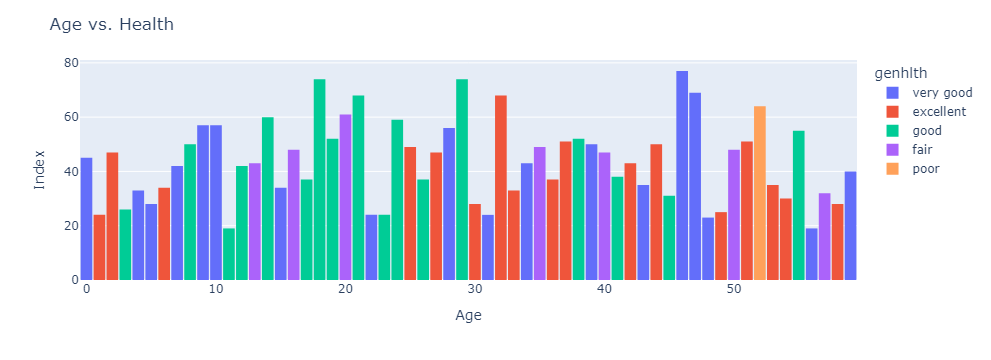

In [65]:
# Your code here
fig = px.bar(DF_new,
            y='age',
            color='genhlth',
            opacity=1
            )
fig.update_layout(bargap=0.1,
                 title='Age vs. Health',
                 xaxis_title='Age',
                 yaxis_title='Index'
                 )
fig.update_traces(dict(marker_line_width=0))

fig.show()